## Title: Final Capstone Project Business requirement and data analysis

#### Background: 
A financial firm is looking for a location to set up office in Toronto. The firm is in business of personal loans, home loans and similar type of loans. Firm is looking for location where it can find maximum number of people requiring loans.

#### Problem: 
The firm needs to find an office, which is convenient to majority of the people who are looking for the similar kind of loans. Such type of loans are usually needed by following type 
•	Office employees – looking for personal loan, home loan 
•	People working in restaurants and cafe – looking for personal loan, home loan
•	Students – looking for higher studies loan
Financial firm needs to choose the correct location to start its first venture in Toronto. If this is successful, they can replicate the same in other locations. First move is very important; thereby choice of location is very important.

In [1]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans

## Data: 
The solution to the above problem will be worked out in two phases. 
Phase 1: Find the locations having office, café, restaurants and schools in Toronto and identify them visually on a map. The foursquare API will be used to find the locations. In the request, we will pass following parameters in section: restaurants, offices and schools. To simplify the problem, we will only use the geographic location to cluster the cafes.
Phase 2: Create "clusters" of the above locations to identify potential places to choose. Financial firm can then decide to choose one or more than one of the suggested locations to start business in Toronto.


In [3]:
CLIENT_ID = 'J24I13KDECMHJKQLJSKHY2XZL2JOHZGVIVW5XVUHB5ZDIKAX'
CLIENT_SECRET = 'QRI02YJQF3BEHM0HH2PUQU3F2VIRIIBP2N2YGOXAC31FYFQ3'
VERSION = '20200604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: J24I13KDECMHJKQLJSKHY2XZL2JOHZGVIVW5XVUHB5ZDIKAX
CLIENT_SECRET:QRI02YJQF3BEHM0HH2PUQU3F2VIRIIBP2N2YGOXAC31FYFQ3


In [4]:
address = 'toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


43.6534817 -79.3839347


## Data Query 
Foursquare API and search query with school, office, resturant and cafe is used to find the possbile locations which has maximum potential clients footfalls

In [5]:
search_query = 'school', 'office', 'resturant', 'cafe'
radius = 6000

In [6]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [7]:
results = requests.get(url).json()
venues = results['response']['groups'][0]['items']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 21 columns):
reasons.count                      19 non-null int64
reasons.items                      19 non-null object
referralId                         19 non-null object
venue.categories                   19 non-null object
venue.id                           19 non-null object
venue.location.address             18 non-null object
venue.location.cc                  19 non-null object
venue.location.city                19 non-null object
venue.location.country             19 non-null object
venue.location.crossStreet         15 non-null object
venue.location.distance            19 non-null int64
venue.location.formattedAddress    19 non-null object
venue.location.labeledLatLngs      19 non-null object
venue.location.lat                 19 non-null float64
venue.location.lng                 19 non-null float64
venue.location.postalCode          16 non-null object
venue.location.state             

In [8]:
df=pd.DataFrame()
df['venue_ID']=dataframe['venue.id']
df['name']=dataframe['venue.name']
df['lat']=dataframe['venue.location.lat']
df['lng']=dataframe['venue.location.lng']
df.head(15)

,venue_ID,name,lat,lng
0,55fc571f498ec35023360858,Cactus Club Cafe,43.649552,-79.381671
1,4bcb2a13fb84c9b68b391e3e,Canadian National Ballet School,43.663681,-79.377237
2,4a8d5b48f964a520840f20e3,The Moonbean Cafe,43.654147,-79.400182
3,4dc16c718877c00d6ad7f2a6,Tangerine Café,43.653937,-79.379722
4,4ab83d73f964a520ad7c20e3,Café Crêpe,43.649940,-79.390949
5,4b08386df964a520910623e3,Arepa Cafe,43.647847,-79.400925
6,4b475b5ef964a520b22f26e3,Holt's Cafe,43.669889,-79.388430
7,4aeb3431f964a52094bf21e3,Free Times Cafe,43.657662,-79.402368
8,581cbc55d84d39216bfe92a4,Pow Wow Cafe,43.654109,-79.401779
9,4ad4c060f964a52086f720e3,7 West Cafe,43.668665,-79.386830


## Data Analysis

KMeans and matplot is used to display the data analysis result to show concentration of places like cafe, resturant, school and office.

In [9]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=14)

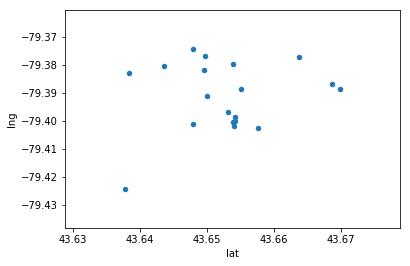

In [10]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt # plotting library


%matplotlib inline

df.plot(x='lat',y='lng',kind='scatter')

In [11]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 300)
df_array=np.array(df[['lat','lng']])
k_means.fit(df_array)
k_labels=pd.DataFrame(k_means.labels_)
k_labels.info()
df['cluster']=k_labels
df.groupby('cluster').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
0    19 non-null int32
dtypes: int32(1)
memory usage: 156.0 bytes


,venue_ID,name,lat,lng
cluster,,,,
0,7,7,7,7
1,1,1,1,1
2,11,11,11,11


In [12]:
for lat, lng, name,venue_ID,cluster in zip(df['lat'], df['lng'], df['name'],df['venue_ID'],df['cluster']):
    
    if cluster == 0:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=6,
            popup=label,
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.6,
            parse_html=False).add_to(map_toronto)  
    if cluster == 1:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=6,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            parse_html=False).add_to(map_toronto)  
    if cluster == 2:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=6,
            popup=label,
            color='orange',
            fill=True,
            fill_color='orange',
            fill_opacity=0.6,
            parse_html=False).add_to(map_toronto)  

        
map_toronto

## Exploratory Data Analysis

In [13]:
center_location=df.groupby('cluster').mean()
center_location

,lat,lng
cluster,,
0,43.649534,-79.379023
1,43.637775,-79.424297
2,43.656247,-79.395997


## Result 
The below map shows three clusters where we have schools, restaurants, cafe and offices are the best place for the financial firms to choose its office as most of the potential clients of the firm are located or come to these locations on regular basis. 

In [14]:
i=0
for lat, lng in zip(center_location['lat'],center_location['lng']):
    folium.Marker([lat,lng], popup='Recommend for Group '+ str(i)).add_to(map_toronto)
    i=i+1
map_toronto

## Conclusion
The above three cluster locations will be convenient to reach for the peoples coming to these places and take the loans as per their requirement. It would help people, as they do not have to travel outside of work areas. The firm would have higher turn around ratio and can set targeted advertisements in these area, it will reduce the advertisement spend over larger area and will result in more focused spend of advertisement in smaller area/cluster. This will be best location for financial firm to setup its office.
